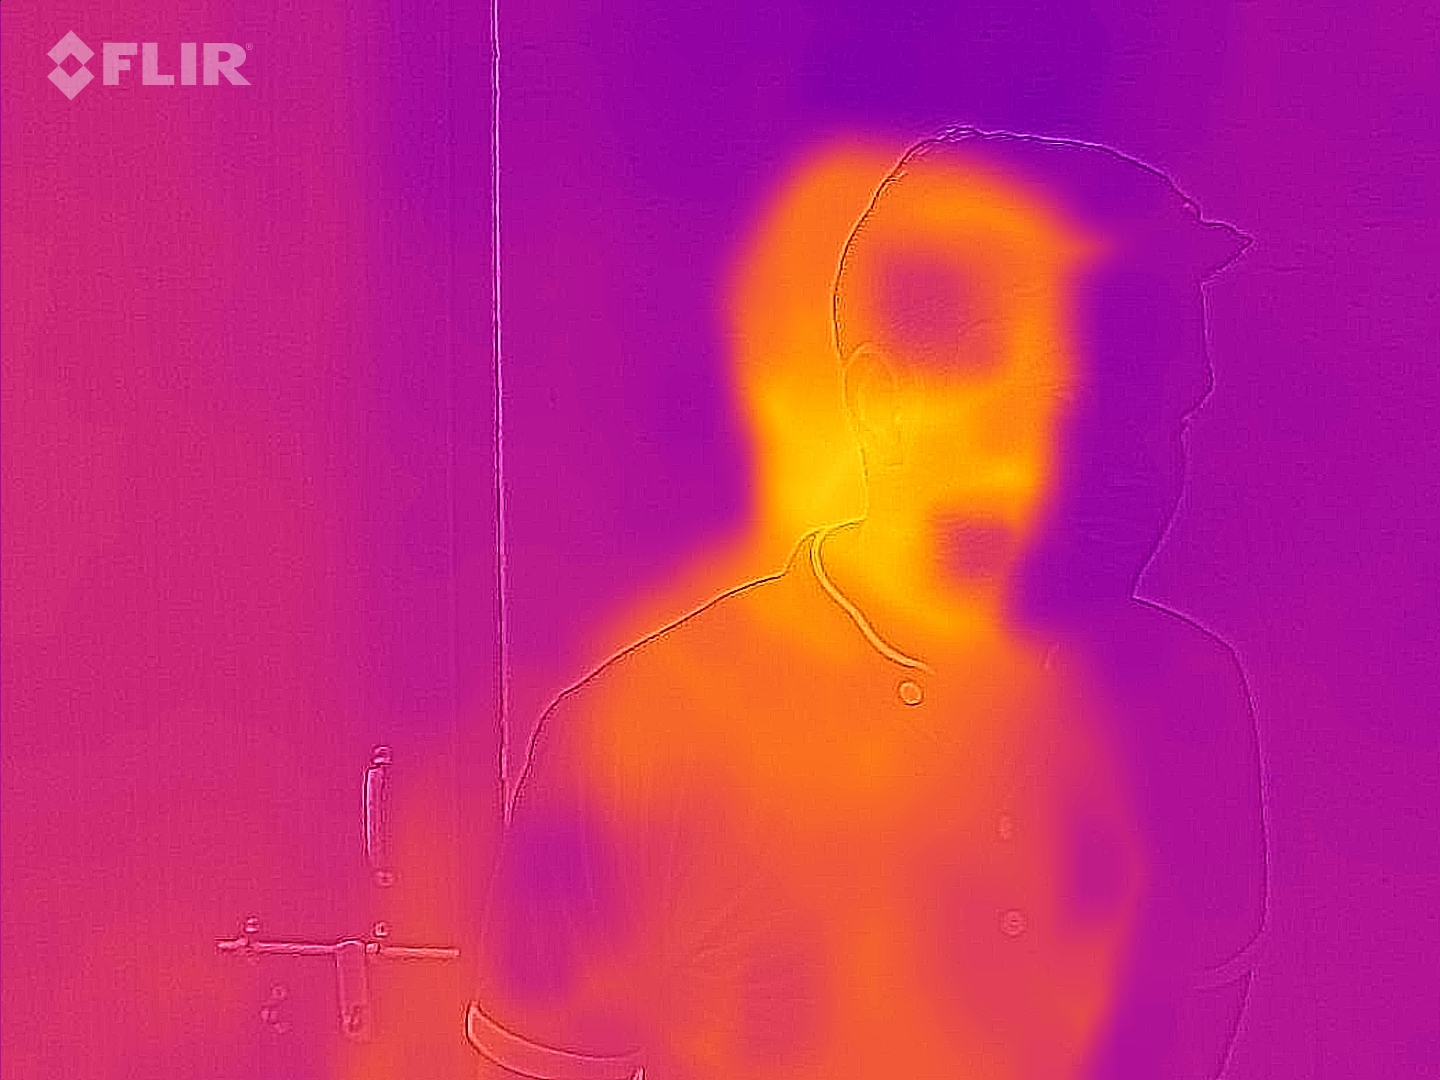

1.3333333333333333
raw (1080, 1440, 3) 0.75
thermal (1091, 792, 3) 1.3775252525252526
optical (1080, 1440, 3) 0.75


In [164]:
from IPython.display import Image, display,display_jpeg
import imageio.v3 as iio

image_id='FLIR_20220323_012820'

optical_path=r'datasets\flir_data\1\optical'+f'/{image_id}.jpg'
csv_path=r'datasets\flir_data\1\csv'+f'/{image_id}.csv'
thermal_path=r'datasets\flir_data\1\thermal'+f'/{image_id}.jpg'
raw_path=r'datasets\flir_data\1\raw'+f'/{image_id}.jpg'

display(Image(raw_path,width='20%'))

print(640/480)
im = iio.imread(raw_path)
print('raw',im.shape,im.shape[0]/im.shape[1])  
im = iio.imread(thermal_path)
print('thermal',im.shape,im.shape[0]/im.shape[1])  
im = iio.imread(optical_path)
print('optical',im.shape,im.shape[0]/im.shape[1])  


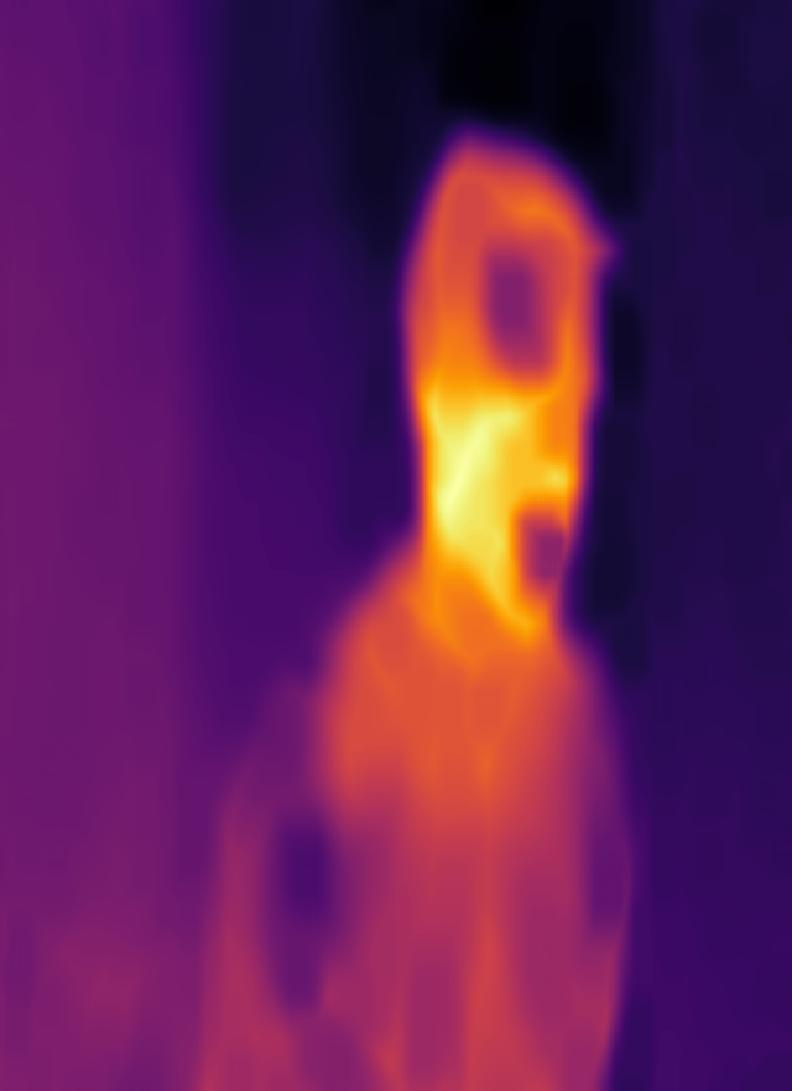

In [165]:
display(Image(thermal_path,width='20%'))

In [166]:
import flyr
thermogram = flyr.unpack(raw_path)
          # thermal = thermogram.kelvin  # As kelvin
thermal = thermogram.celsius  # As celsius
# Get Raw image
optical_arr = thermogram.optical  # Also works
thermogram.optical_pil.save('datasets/test_data/test1.jpg')
# display(Image('datasets/test_data/test1.jpg',width='20%'))


(1440, 1080)


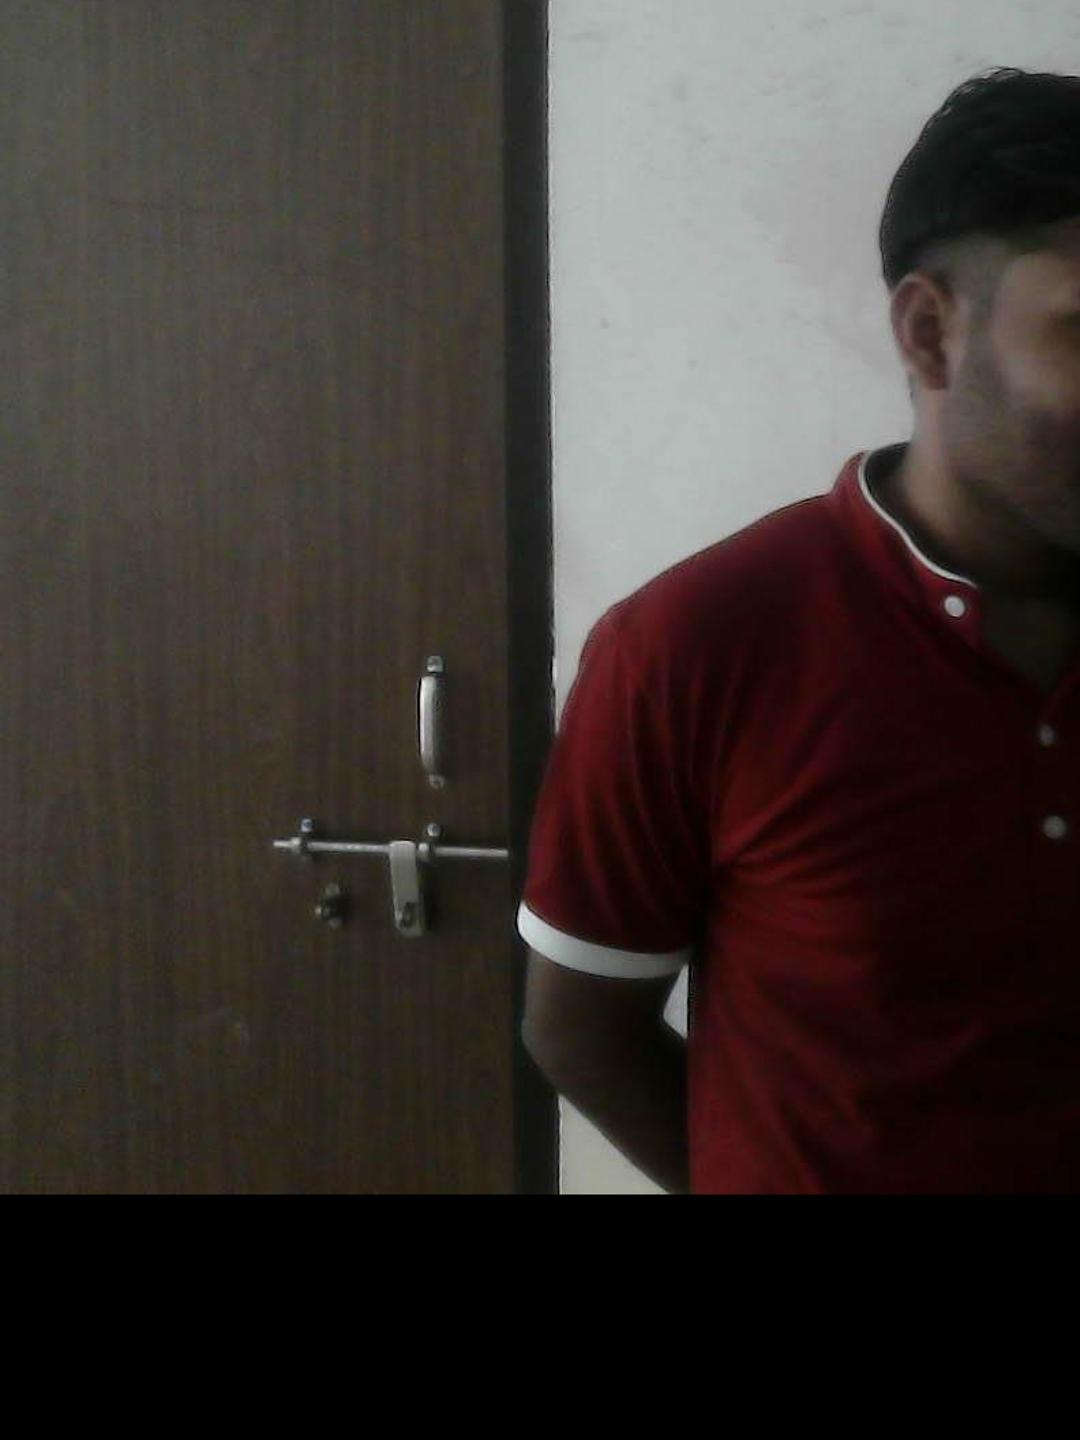

optical (1440, 1080, 3) 1.3333333333333333


In [167]:
# Crop optical image
from PIL import Image
import IPython
def crop_image(image_path):
    #cropping images
    img = Image.open(image_path) ## 打开chess.png文件，并赋值给img
    print(img.size)
    width=img.size[0]
    height=img.size[1]
    region = img.crop((144,175,792+144,1091+175))## 0,0表示要裁剪的位置的左上角坐标，50,50表示右下角。
    region = region.resize((1080,1440))
    # region_resized=region.resize((64,64))
    return region

cropped_image=crop_image(optical_path)
cropped_image.save('datasets/test_data/test2.jpg')
display(IPython.display.Image('datasets/test_data/test2.jpg',width='20%'))

im = iio.imread('datasets/test_data/test2.jpg')
print('optical',im.shape,im.shape[0]/im.shape[1])  


optical (1080, 1440)
optical (1080, 1440)


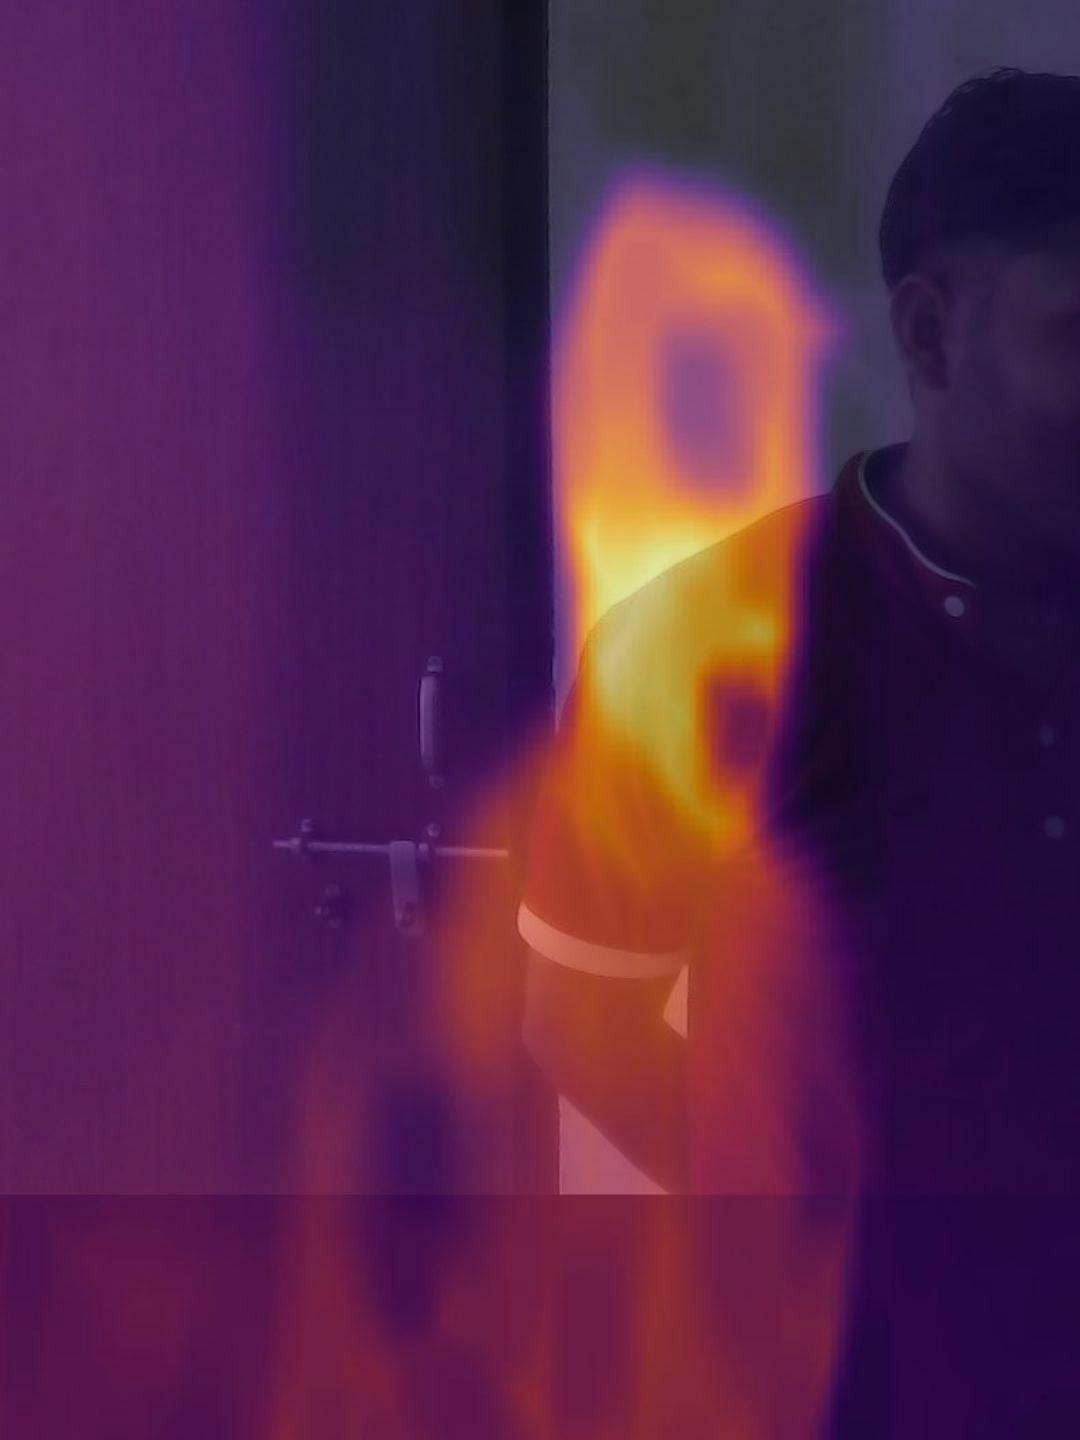

In [168]:
# combine image
from PIL import Image
import IPython


img=Image.open(thermal_path)
img=img.resize((1080,1440))
img.save('datasets/test_data/test4.jpg')

img = Image.open('datasets/test_data/test4.jpg')
img2 = Image.open('datasets/test_data/test2.jpg')

print('optical',img.size)  
print('optical',img2.size)  

merge = Image.blend(img, img2, 0.3)
merge.save('datasets/test_data/test3.jpg')

display(IPython.display.Image('datasets/test_data/test3.jpg',width='20%'))